In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#kütüphaneleri importladık

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#kullanılacak algoritmalar eklendi

In [3]:
from sklearn.model_selection import train_test_split


df=pd.read_csv('train.csv')


df.head()
df



,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,788,0,1,0.1000,0.056848,0,0,1,0.5,0,0,1,0,0,1,0
788,788,789,1,1,0.0125,0.040160,0,0,1,0.3,0,0,1,0,0,0,1
789,789,790,0,1,0.5750,0.154588,1,0,0,0.0,1,0,0,0,1,0,0
790,790,791,0,1,0.3500,0.015127,0,0,1,0.0,1,0,0,0,0,1,0


In [90]:
# 'Sex_female' sütununu oluşturma
df['Sex_female'] = df['Sex'].apply(lambda x: 1 if x == 1 else 0)

# 'Sex_male' sütununu oluşturma
df['Sex_male'] = df['Sex'].apply(lambda x: 1 if x == 0 else 0)

# 'Sex' sütununu veri çerçevesinden kaldırma
df = df.drop('Sex', axis=1)

df

,Unnamed: 0,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3,Sex_female,Sex_male
0,0,1,0,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1,1,0
1,1,2,1,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0,0,1
2,2,3,1,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1,0,1
3,3,4,1,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1,0,1
4,4,5,0,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,788,0,0.1000,0.056848,0,0,1,0.5,0,0,1,0,0,1,0,1,0
788,788,789,1,0.0125,0.040160,0,0,1,0.3,0,0,1,0,0,0,1,1,0
789,789,790,0,0.5750,0.154588,1,0,0,0.0,1,0,0,0,1,0,0,1,0
790,790,791,0,0.3500,0.015127,0,0,1,0.0,1,0,0,0,0,1,0,1,0


In [108]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Age', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3',
       'Title_4', 'Emb_1', 'Emb_2', 'Emb_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [91]:
df[['Survived', 'Sex_female', 'Sex_male']]


,Survived,Sex_female,Sex_male
0,0,1,0
1,1,0,1
2,1,0,1
3,1,0,1
4,0,1,0
...,...,...,...
787,0,1,0
788,1,1,0
789,0,1,0
790,0,1,0


In [96]:
male_survived = df[df['Sex_male'] == 0]['Survived'].sum()
male_died = df[df['Sex_male'] == 1]['Survived'].count() - male_survived

print("Hayatta kalan erkek sayısı:", male_survived)
print("Ölen erkek sayısı:", male_died)


Hayatta kalan erkek sayısı: 97
Ölen erkek sayısı: 182


In [97]:
male_survived = df[df['Sex_male'] == 0]['Survived'].sum()
total_male = df[df['Sex_male'] == 1]['Survived'].count()

survival_rate_male = male_survived / total_male

print("Hayatta kalan erkeklerin oranı:", survival_rate_male)


Hayatta kalan erkeklerin oranı: 0.34767025089605735


In [100]:
female_survived = df[df['Sex_female'] == 0]['Survived'].sum()
female_died = df[df['Sex_female'] == 1]['Survived'].count() - female_survived

print("Hayatta kalan kadın sayısı:", female_survived)
print("Ölen kadın sayısı:", female_died)

Hayatta kalan kadın sayısı: 209
Ölen kadın sayısı: 304


In [101]:
female_survived = df[df['Sex_female'] == 1]['Survived'].sum()
total_female = df[df['Sex_female'] == 1]['Survived'].count()

survival_rate_female = female_survived / total_female

print("Hayatta kalan kadınlarin oranı:", survival_rate_female)

Hayatta kalan kadınlarin oranı: 0.18908382066276802


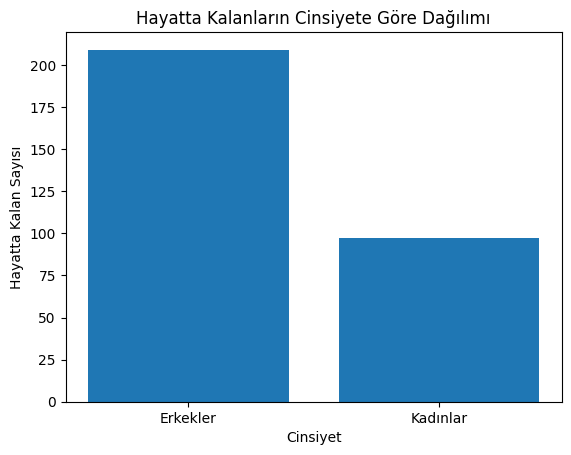

In [102]:
import matplotlib.pyplot as plt

# Hayatta kalan erkeklerin ve kadınların sayılarını hesapla
male_survived = df[df['Sex_male'] == 1]['Survived'].sum()
female_survived = df[df['Sex_female'] == 1]['Survived'].sum()

# Grafik verilerini oluştur
labels = ['Erkekler', 'Kadınlar']
survived_counts = [male_survived, female_survived]

# Grafik oluşturma
plt.bar(labels, survived_counts)
plt.xlabel('Cinsiyet')
plt.ylabel('Hayatta Kalan Sayısı')
plt.title('Hayatta Kalanların Cinsiyete Göre Dağılımı')
plt.show()


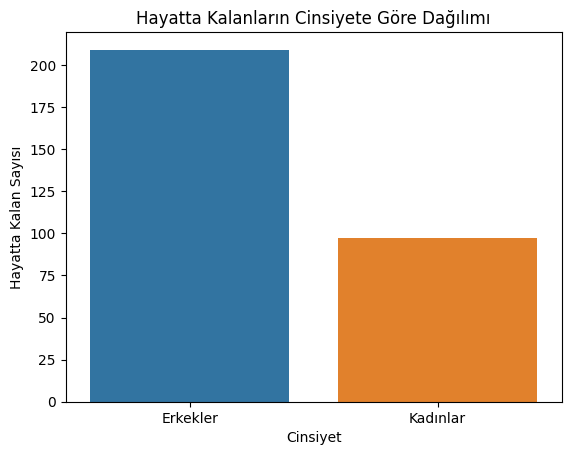

In [103]:
import seaborn as sns

# Hayatta kalan erkekler ve kadınların sayılarını hesapla
male_survived = df[df['Sex_male'] == 1]['Survived'].sum()
female_survived = df[df['Sex_female'] == 1]['Survived'].sum()

# Grafik verilerini oluştur
labels = ['Erkekler', 'Kadınlar']
survived_counts = [male_survived, female_survived]

# Veri çerçevesini oluştur
data = pd.DataFrame({'Cinsiyet': labels, 'Hayatta Kalan Sayısı': survived_counts})

# Grafik oluşturma
sns.barplot(x='Cinsiyet', y='Hayatta Kalan Sayısı', data=data)
plt.xlabel('Cinsiyet')
plt.ylabel('Hayatta Kalan Sayısı')
plt.title('Hayatta Kalanların Cinsiyete Göre Dağılımı')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


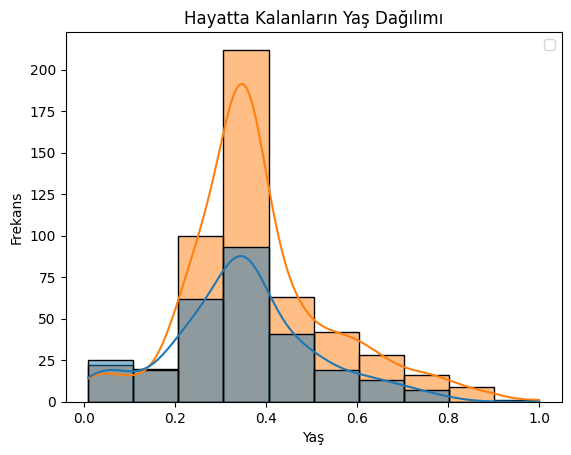

In [104]:
import seaborn as sns

# Hayatta kalan erkeklerin ve kadınların yaş dağılımını al
male_survived_ages = df[df['Sex_male'] == 1]['Age']
female_survived_ages = df[df['Sex_female'] == 1]['Age']

# Grafik verilerini birleştir
data = pd.concat([male_survived_ages, female_survived_ages], axis=1, keys=['Erkekler', 'Kadınlar'])

# Grafik oluşturma
sns.histplot(data=data, bins=10, kde=True)
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.title('Hayatta Kalanların Yaş Dağılımı')
plt.legend()
plt.show()


In [111]:
from sklearn.ensemble import RandomForestClassifier

# Bağımlı değişken
y_train = df["Survived"]

# Bağımsız değişkenler
features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3', 'Sex_female', 'Sex_male', 'Age']
X_train = df[features]

# Model oluşturma ve eğitim
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

# Tahminler yapma
predictions = model.predict(X_train)

# Tahminleri CSV dosyasına kaydetme
output = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
print(output)

comparison = pd.DataFrame({'PassengerId': df['PassengerId'],
                           'Survived (Original)': df['Survived'],
                           'Survived (Predicted)': predictions})

# Print the comparison
print(comparison)





Your submission was successfully saved!
     PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
787          788         0
788          789         1
789          790         0
790          791         0
791          792         0

[792 rows x 2 columns]
     PassengerId  Survived (Original)  Survived (Predicted)
0              1                    0                     0
1              2                    1                     1
2              3                    1                     1
3              4                    1                     1
4              5                    0                     0
..           ...                  ...                   ...
787          788                    0                     0
788          789                    1                     1
789          790                    0                     0
790         